In [1]:
import os
import zipfile

In [3]:
with zipfile.ZipFile('2021_SPORT_v2025.zip', 'r') as zip_ref:
    zip_ref.extractall('2021_SPORT_v2025')

In [24]:
file_paths = []
for root, dirs, files in os.walk('2021_SPORT_v2025'):
    for file in files:
        if file.endswith('.txt'):
            file_paths.append(os.path.join(root, file))

In [25]:
file_paths

['2021_SPORT_v2025/1/81.txt',
 '2021_SPORT_v2025/1/59.txt',
 '2021_SPORT_v2025/1/87.txt',
 '2021_SPORT_v2025/1/95.txt',
 '2021_SPORT_v2025/1/83.txt',
 '2021_SPORT_v2025/1/56.txt',
 '2021_SPORT_v2025/1/100.txt',
 '2021_SPORT_v2025/1/21.txt',
 '2021_SPORT_v2025/1/4.txt',
 '2021_SPORT_v2025/1/7.txt',
 '2021_SPORT_v2025/1/35.txt',
 '2021_SPORT_v2025/1/42.txt',
 '2021_SPORT_v2025/1/46.txt',
 '2021_SPORT_v2025/1/92.txt',
 '2021_SPORT_v2025/1/65.txt',
 '2021_SPORT_v2025/1/49.txt',
 '2021_SPORT_v2025/1/25.txt',
 '2021_SPORT_v2025/1/58.txt',
 '2021_SPORT_v2025/1/77.txt',
 '2021_SPORT_v2025/1/45.txt',
 '2021_SPORT_v2025/1/60.txt',
 '2021_SPORT_v2025/1/43.txt',
 '2021_SPORT_v2025/1/33.txt',
 '2021_SPORT_v2025/1/67.txt',
 '2021_SPORT_v2025/1/66.txt',
 '2021_SPORT_v2025/1/96.txt',
 '2021_SPORT_v2025/1/74.txt',
 '2021_SPORT_v2025/1/89.txt',
 '2021_SPORT_v2025/1/24.txt',
 '2021_SPORT_v2025/1/37.txt',
 '2021_SPORT_v2025/1/75.txt',
 '2021_SPORT_v2025/1/32.txt',
 '2021_SPORT_v2025/1/57.txt',
 '2021_SPOR

In [11]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 83.7 MB/s eta 0:00:00


In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy3

In [19]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

In [17]:
def preprocess_text(text):
    tokens = word_tokenize(text, language='russian')
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    lemmas = [morph.parse(token)[0].normal_form for token in tokens]
    return ' '.join(lemmas)

In [43]:
corpus = []
doc_names = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    processed_text = preprocess_text(text)
    corpus.append(processed_text)
    doc_names.append(file_path)

In [27]:
corpus

['хоккеист питерский динамо тимур файзутдин скончаться попадание шайба голова защитник клуб молодёжный хоккейный лига динамо тимур файзутдин скончаться реанимация ярославский больница информировать социальный сеть вконтакте хоккеист попасть реанимация март время матч финал мхл против локо игровой ситуация шайба попасть голова файзутдин попадание шайба схватиться голова упасть лёд нынешний сезон принять участие матч регулярный чемпионат мхл который сделать семь результативный передача файзутдин сыграть два встреча',
 'церемония прощание хоккеист тимур файзутдинов пройти челябинск родственник болельщик проститься челябинск хоккеист петербургский динамо тимур файзутдинов который умереть вторник возраст год информировать тасс церемония прощание воспитанник челябинский хоккей пройти ледовый арена трактор имя валерий белоусов человек возлагать цветок гроб хоккеист играть траурный оркестр напомнить март время гостевой матч динамо серия первый раунд мхл против локо ярославль шайба попасть обла

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer(max_features=150)
X = vectorizer.fit_transform(corpus).toarray()

In [30]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [31]:
dist_matrix = squareform(pdist(X, metric='cosine'))

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

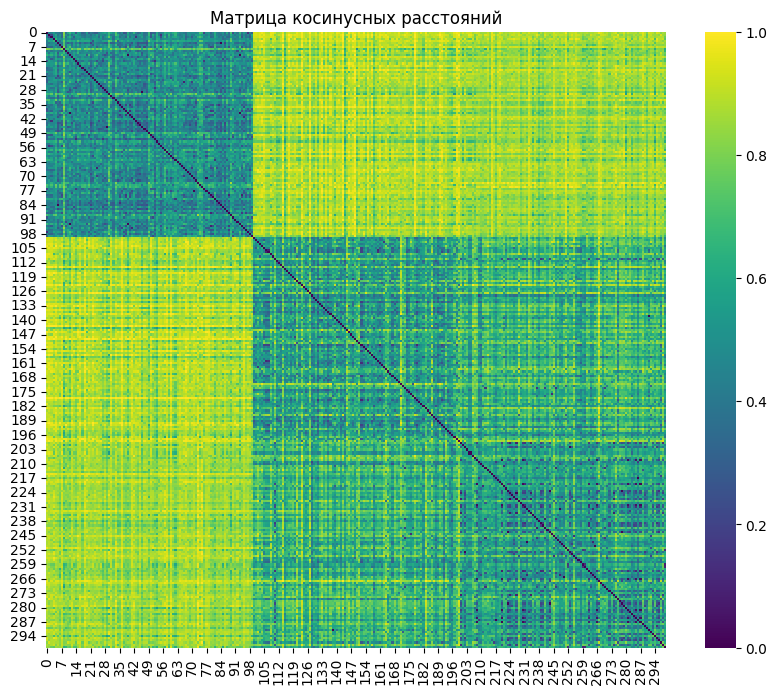

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap='viridis')
plt.title('Матрица косинусных расстояний')
plt.show()

In [34]:
delta = 4.0
similarity_matrix = np.exp(- dist_matrix ** 2 / (2. * delta ** 2))

In [35]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [45]:
n_clusters = 3
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
labels = sc.fit_predict(similarity_matrix)

sil_score = silhouette_score(X, labels, metric='cosine')
print(f'Коэффициент силуэта: {sil_score:.3f}')

Коэффициент силуэта: 0.252


In [37]:
from sklearn.decomposition import PCA

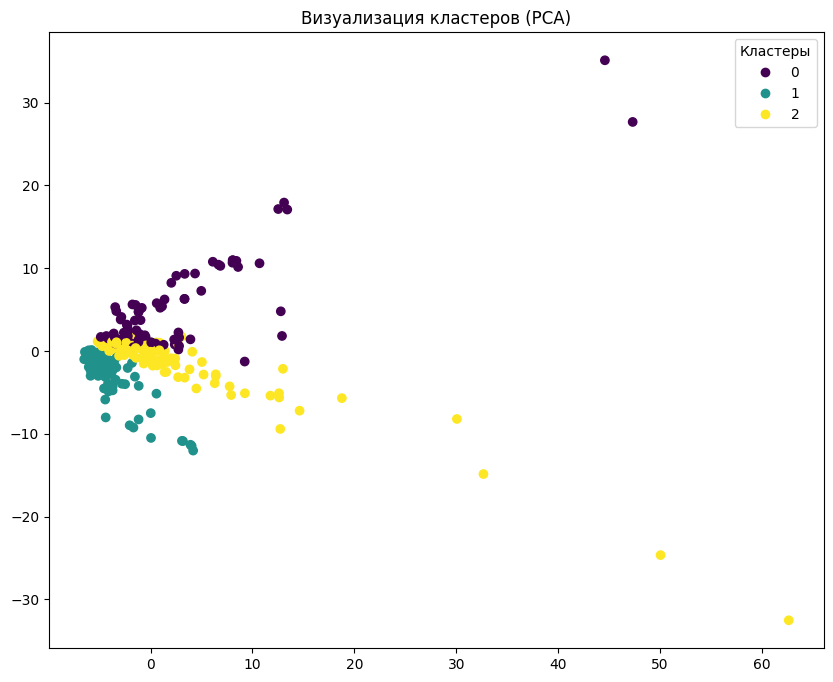

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.title('Визуализация кластеров (PCA)')
plt.show()

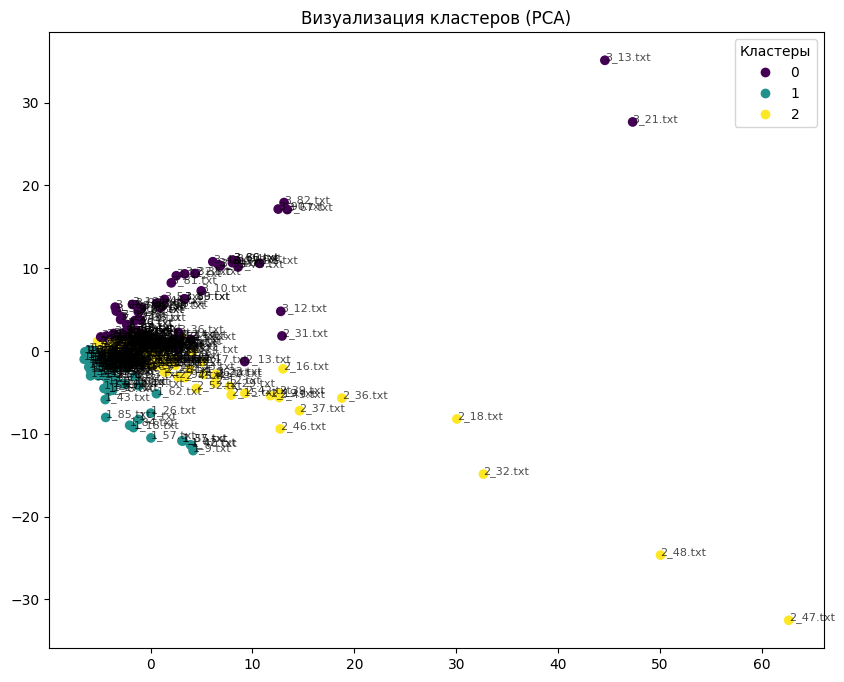

In [49]:
import os

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')

for i, file_path in enumerate(doc_names):
    file_name = os.path.basename(file_path)
    folder_name = os.path.basename(os.path.dirname(file_path))
    plt.annotate(f'{folder_name}_{file_name}', (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.title('Визуализация кластеров (PCA)')
plt.show()
